<a href="https://colab.research.google.com/github/yj9889/ESAA2/blob/main/220314%EB%B6%84%EB%A5%98%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **핸즈온 머신러닝 - 03. 분류** 
##### 2022.03.14.

# [개념정리]

> ## 3.1 MNIST

* MNIST: 미국 고등학생과 인구조사국 직원들이 손으로 쓴 70,000개의 숫자 이미지로 구성된 데이터셋

* 사이킷런에서 읽어들인 데이터셋의 일반적인 딕셔너리 구조
  * DESCR 키: 데이터셋 설명
  * data 키: 샘플이 하나의 행, 특성이 하나의 열로 구성된 배열을 가짐
  * target 키: 레이블 배열을 담음

* 70,000개의 샘플(이미지)의 특성은 784개이다.
  * 이미지가 28x28=784개의 픽셀(화소)로 구성되었기 때문
  * 개개의 특성은 단순히 0(흰색)부터 255(검은색)까지의 픽셀 강도를 나타냄.

* 훈련 세트는 이미 섞여 있어서 모든 교차 검증 폴드를 비슷하게 만든다(하나의 폴드라도 특정 숫자가 누락되면 안된다).
  * 어떤 학습 알고리즘은 훈련 샘플 순서에 민감해 많은 비슷한 샘플이 연이어 나타나면 성능이 나빠지는데, 데이터셋을 섞으면 이런 문제를 방지할 수 있다.

> ## 3.2 이진 분류기 훈련

* 사이킷런의 SGDClassifier 클래스 - 확률적 경사 하강법(SGD)
  * 한 번에 하나의 훈련 샘플을 독립적으로 처리해 매우 큰 데이터셋을 효율적 처리.
  * 클래스별 비율이 유지되도록 폴드를 만들기 위해 계층적 샘플링 수행. 
  * 매 반복에서 분류기 객체를 복제하여 훈련 폴드로 훈련시키고 테스트 폴드로 예측을 만든다. 그 다음 올바른 예측 수를 세어 정확한 예측의 비율을 출력한다.

> ## 3.3 성능 측정


>> ## 3.3.1 교차 검증을 사용한 정확도 측정

* k겹 교차 검증은 훈련 세트를 k개의 폴드로 나누고, 각 폴드에 대해 예측을 만들고 평가하기 위해 나머지 폴드로 훈련시킨 모델을 사용.

* 불균형한 데이터셋을 다룰 때(어떤 클래스가 다른 것보다 월등히 많은 경우) 정확도를 분류기의 성능 지표로 활용하지 않음.


>> ## 3.3.2 오차 행렬

* 우선, 실제 타깃과 비교할 수 있도록 예측값을 만든다. 

* cross_val_predict()
  * k겹 교차 검증을 수행하지만 평가 점수를 반환하지 않고 각 테스트 폴드에서 얻은 예측을 반환한다.

* 오차 행렬
  * 행: 실제 클래스
  * 열: 예측한 클래스

|*음성 클래스*|진짜 음성|거짓 양성|
|------|---|---|
|*양성 클래스*|거짓 음성|진짜 양성|

* 정밀도
  * TP / (TP+FP)
    * TP: 진짜 양성, FP: 거짓 양성
  * 양성 예측의 정확도. 

* 정확도=민감도
  * 분류기가 정확히 감지한 양성 샘플의 비율
    * TP / (TP+FN)


>> ## 3.3.3 정밀도와 재현율

* F1 점수
  * 정밀도와 재현율의 조화 평균
  * 정밀도와 재현율이 비슷하면 F1이 큼.
    * 식: 10p

>> ## 3.3.4 정밀도/재현율 트레이드오프

* SGDClassifier
  * 결정 함수로 각 샘플의 점수 계산.
    * 이 점수>임곗값 -> 샘플: 양성 클래스에 할당.
    * 이 점수<임곗값 -> 샘플: 음성 클래스에 할당.
  * 결정 임곗값을 높이면 정밀도 커지고 재현율 낮아짐
  * 사이킷런에서는 임곗값 직접 지정 대신 예측에 사용된 점수 확인할 수 있다.

* 적절한 임곗값 정하기
  * cross_val_predict() 이용해 훈련 세트의 모든 샘플의 점수 구한다.(단, 예측 결과가 아닌 결정 점수 반환)
  * 재현율에 대한 정밀도 곡선을 그리면 좋은 정밀도/재현율 트레이드오프 선택할 수 있다.

>> ## 3.3.5 ROC 곡선

* 거짓 양성 비율(FPR)에 대한 진짜 양성 비율(TPR)의 곡선
* 민감도(재현율)에 대한 1-특이도 그래프

  * 1 - 진짜 음성 비율(TNR) = 거짓 양성 비율(FPR)
    * TNR: 특이도

* 트레이드오프
  * 재현율(TPR)이 높을수록 FPR이 늘어난다. 

* AUC: 곡선 아래의 면적
  * AUC=1 : 완전한 분류기
  * AUC=0.5 : 완전한 랜덤 분류기

* PR 곡선: 양성 클래스가 드물거나 거짓 음성보다 거짓 양성이 더 중요할 때(분류기의 성능 개선 여지, 오른쪽 위 모서리)
* ROC 곡선: 그 반대.

* predict_proba()
  * 샘플: 행, 클래스: 열
  * 주어진 클래스에 속할 확률을 담은 배열 반환.

> ## 3.4 다중 분류

* 둘 이상의 클래스를 구별
  * SGD, 랜덤 포레스트, 나이브 베이즈 분류기: 여러 클래스 직접 처리 가능
  * 로지스틱 회귀, 서포트 벡터 머신 분류기: 이진 분류만 가능.

<이진 분류기를 여러 개 사용해 다중 클래스를 분류하는 기법>
* OvR 전략 / OvA 전략
  * 이미지를 분류할 때 각 분류기의 결정 점수 중에서 가장 높은 것을 클래스로 선택. 
  * 이진 분류 알고리즘 선호.
* OvO 전략
  * 각 숫자의 조합마다 이진 분류기를 훈련시킴.
  * 각 분류기의 훈련에 전체 훈련 세트 중 구별할 두 클래스에 해당하는 샘플만 필요하다는 장점.
  * 서포트 벡터 머신처럼 훈련 세트 크기에 민감해 작은 훈련 세트에서 많은 분류기를 훈련시키는 것이 빠른 알고리즘 선호.

* OneVsOneClassifier / OneVsRestClassifier
  * 사이킷런에서 OvR이나 OvO 사용하도록 강제

> ## 3.5 에러 분석

* 목적: 모델의 성능 향상
* 선형 모델인 SGDClassifier
  * 클래스마다 픽셀에 가중치를 할당하고 새로운 이미지에 대해 단순히 픽셀 강도의 가중치 합을 클래스의 점수로 계산하기 때문에 쉽게 혼동 가능성.

> ## 3.6 다중 레이블 분류

* 분류기가 샘플마다 여러 개의 클래스를 출력해야 할 때, 여러 개의 이진 꼬리표를 출력하는 분류 시스템
* 레이블 클래스에 지지도(타깃 레이블에 속한 샘플 수)를 가중치로 줄 수 있음. *average="weighted"*

> ## 3.7 다중 출력 분류

* 다중 레이블 분류에서 한 레이블이 다중 클래스가 될 수 있도록 일반화한 것.(즉, 값을 두 개 이상 가질 수 있음)

* 입력: 잡음이 많은 숫자 이미지
*출력: 깨끗한 숫자 이미지를 MNIST 이미지처럼 픽셀의 강도를 담은 배열
  * 다중 레이블(픽셀당 한 레이블)이고 각 레이블은 값을 여러 개 가짐(0~255 픽셀 강도)

# [필사]

> ## 3.1 MNIST

In [98]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [99]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [100]:
X, y = mnist["data"], mnist["target"]

In [101]:
X.shape

(70000, 784)

In [102]:
y.shape

(70000,)

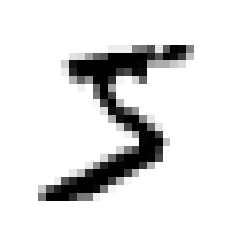

In [103]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X.to_numpy()[0] # 샘플의 특성 벡터 추출
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")
plt.show()

In [104]:
y[0] # 실제 레이블은 숫자 5

'5'

In [105]:
import numpy as np
y = y.astype(np.uint8) # y를 정수로 변환

In [106]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

> ## 3.2 이진 분류기 훈련

In [107]:
y_train_5 = (y_train == 5) # 5는 True, 다른 숫자는 False인 타깃 벡터
y_test_5 = (y_test == 5)

In [108]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42) # 무작위성을 이용해 훈련하는 특성이 있어, 결과를 재현하기 위해 random_state 이용
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [109]:
sgd_clf.predict([some_digit])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([ True])

> ## 3.3 성능 측정
>> ## 3.3.1 교차 검증을 사용한 정확도 측정

In [110]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

for train_index, test_index in skfolds.split(X_train, y_train_5):  
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train.values[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train.values[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9669
0.91625
0.96785


In [111]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [112]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [113]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy") # 샘플의 불균형으로 인해 정확도가 지나치게 높음.

array([0.91125, 0.90855, 0.90915])

>> ## 3.3.2 오차 행렬



In [114]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [115]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [116]:
y_train_perfect_predictions = y_train_5 # 완벽한 분류기일 경우
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

>> ## 3.3.3 정밀도와 재현율

In [117]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [118]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [119]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846

>> ## 3.3.4 정밀도/재현율 트레이드오프

In [120]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([2164.22030239])

In [121]:
threshold=0
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([ True])

In [122]:
threshold=8000 # 임곗값 늘리면 재현율 줄어듦  
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([False])

In [123]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [124]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

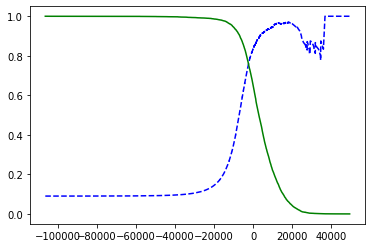

In [125]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], "b--", label="정밀도")
  plt.plot(thresholds, recalls[:-1], "g-", label="재현율")
  [...] # 임곗값 표시하고 범례, 축, 이름, 그리드 추가

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [126]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

3370.019499143958

In [127]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [128]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

>> ## 3.3.5 ROC 곡선

In [129]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

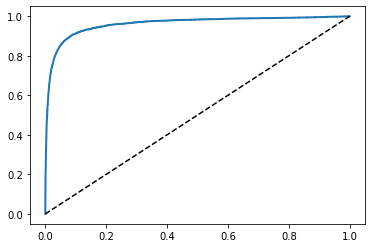

In [130]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # 대각 점선
    [...]

plot_roc_curve(fpr, tpr)
plt.show()

In [131]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [132]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [133]:
y_scores_forest = y_probas_forest[:, 1] # 양성 클래스에 대한 확률을 점수로 사용
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47004 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47112 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_

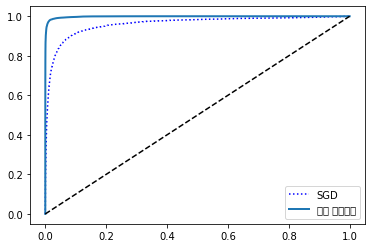

In [134]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "랜덤 포레스트") # 랜덤 포레스트 > SGD 성능
plt.legend(loc="lower right")
plt.show()

In [135]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

> ## 3.4 다중 분류

In [ ]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict([some_digit])

In [ ]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores

In [ ]:
np.argmax(some_digit_scores)

In [ ]:
svm_clf.classes_

In [ ]:
svm_clf.classes_[5]

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])

In [ ]:
len(ovr_clf.estimators_)

In [ ]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

In [ ]:
sgd_clf.decision_function([some_digit])

In [ ]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

> ## 3.5 에러 분석

In [ ]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

In [ ]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

In [ ]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [ ]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

> ## 3.6 다중 레이블 분류

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

In [ ]:
knn_clf.predict([some_digit])

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

> ## 3.7 다중 출력 분류

In [ ]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [ ]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)